# Task 4.9
### Part 1
1. Download the customer data set and add it to your “Original Data” folder.
2. Create a new notebook in your “Scripts” folder for part 1 of this task.
3. Import your analysis libraries, as well as your new customer data set as a dataframe.
4. Wrangle the data so that it follows consistent logic; for example, rename columns with illogical names and drop columns that don’t add anything to your analysis.
5. Complete the fundamental data quality and consistency checks you’ve learned throughout this Achievement; for example, check for and address missing values and duplicates, and convert any mixed-type data.
6. Combine your customer data with the rest of your prepared Instacart data. (Hint: Make sure the key columns are the same data type!)
7. Ensure your notebook contains logical titles, section headings, and descriptive code comments.
8. Export this new dataframe as a pickle file so you can continue to use it in the second part of this task.
9. Save your notebook so that you can send it to your tutor for review after completing part 2.



## 3. import libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#set path
path = r"C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 4\Instacart Basket Analysis"

### import "customers.csv"

In [3]:
%%time 
df_cust = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', '4.9_customers', 'customers.csv'))

CPU times: total: 125 ms
Wall time: 190 ms


### import merged data "4.8.pkl"

In [4]:
%%time 
df_merged = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.8.pkl'))

CPU times: total: 15.5 s
Wall time: 5min 20s


## 4. Wrangle data

### rename columns using lower case and snake script

In [5]:
%%time
df_cust.rename(columns = {'First Name':'first_name', 'Surnam':'surname', 'Gender':'gender', 'STATE':'state', 'Age':'age'}, inplace = True)

CPU times: total: 0 ns
Wall time: 3.64 ms


In [6]:
#check
df_cust

,user_id,first_name,surname,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374
...,...,...,...,...,...,...,...,...,...,...
206204,168073,Lisa,Case,Female,North Carolina,44,4/1/2020,1,married,148828
206205,49635,Jeremy,Robbins,Male,Hawaii,62,4/1/2020,3,married,168639
206206,135902,Doris,Richmond,Female,Missouri,66,4/1/2020,2,married,53374
206207,81095,Rose,Rollins,Female,California,27,4/1/2020,1,married,99799


### drop unnecessary columns

In [7]:
%%time
df_cust_rename_drop = df_cust.drop(columns = ['first_name', 'surname'])

CPU times: total: 0 ns
Wall time: 14.3 ms


In [8]:
#check
df_cust4 = df_cust_rename_drop
df_cust4

,user_id,gender,state,age,date_joined,n_dependants,fam_status,income
0,26711,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Female,Maryland,26,1/1/2017,1,married,40374
...,...,...,...,...,...,...,...,...
206204,168073,Female,North Carolina,44,4/1/2020,1,married,148828
206205,49635,Male,Hawaii,62,4/1/2020,3,married,168639
206206,135902,Female,Missouri,66,4/1/2020,2,married,53374
206207,81095,Female,California,27,4/1/2020,1,married,99799


## 5. Quality and consistency check

### 5.1 data type conversion

In [9]:
#check data type
df_cust4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       206209 non-null  int64 
 1   gender        206209 non-null  object
 2   state         206209 non-null  object
 3   age           206209 non-null  int64 
 4   date_joined   206209 non-null  object
 5   n_dependants  206209 non-null  int64 
 6   fam_status    206209 non-null  object
 7   income        206209 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 12.6+ MB


In [10]:
#convert user_id to object. must match the dataframe: ords_prods_merge to combine data sets 
df_cust4['user_id'] = df_cust4['user_id'].astype('str')

In [11]:
#convert date_joined to type 'datetime64[ns]'
df_cust4['date_joined'] = pd.to_datetime(df_cust4['date_joined'], format='%m/%d/%Y')

In [12]:
#check mixed type
for col in df_cust4.columns.tolist():     
  weird = (df_cust4[[col]].applymap(type) != df_cust4[[col]].iloc[0].apply(type)).any(axis = 1) 
  if len (df_cust4[weird]) > 0:
    print (col)

#### -- no mixed type columns exist

In [13]:
#check
df_cust4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206209 entries, 0 to 206208
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       206209 non-null  object        
 1   gender        206209 non-null  object        
 2   state         206209 non-null  object        
 3   age           206209 non-null  int64         
 4   date_joined   206209 non-null  datetime64[ns]
 5   n_dependants  206209 non-null  int64         
 6   fam_status    206209 non-null  object        
 7   income        206209 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 12.6+ MB


### 5.2 missing values

In [14]:
#check each column for null
df_cust4.isnull().sum()

user_id         0
gender          0
state           0
age             0
date_joined     0
n_dependants    0
fam_status      0
income          0
dtype: int64

#### -- no action needed

### 5.3 check for duplicates

In [15]:
df_cust4.duplicated().sum()

0

#### -- no action needed

### 5.4 additional quality check for each column as needed
### user_id	

In [16]:
#check descriptive stats 
df_cust4['user_id'].describe()

count     206209
unique    206209
top        26711
freq           1
Name: user_id, dtype: object

### gender	

In [17]:
#descriptive stats
df_cust4['gender'].describe()

count     206209
unique         2
top         Male
freq      104067
Name: gender, dtype: object

In [18]:
#check frequency
df_cust4['gender'].value_counts(dropna = False)

Male      104067
Female    102142
Name: gender, dtype: int64

#### -- no action needed

### state	

In [19]:
#descriptive stats
df_cust4['state'].describe()

count      206209
unique         51
top       Florida
freq         4044
Name: state, dtype: object

In [20]:
#check frequency 
df_cust4['state'].value_counts(dropna = False)

Florida                 4044
Colorado                4044
Illinois                4044
Alabama                 4044
District of Columbia    4044
Hawaii                  4044
Arizona                 4044
Connecticut             4044
California              4044
Indiana                 4044
Arkansas                4044
Alaska                  4044
Delaware                4044
Iowa                    4044
Idaho                   4044
Georgia                 4044
Wyoming                 4043
Mississippi             4043
Oklahoma                4043
Utah                    4043
New Hampshire           4043
Kentucky                4043
Maryland                4043
Rhode Island            4043
Massachusetts           4043
Michigan                4043
New Jersey              4043
Kansas                  4043
South Dakota            4043
Minnesota               4043
Tennessee               4043
New York                4043
Washington              4043
Louisiana               4043
Montana       

#### --number of customers per state is unusually similar
#### --no action needed

### age	

In [21]:
#descriptive stats
df_cust4['age'].describe()

count    206209.000000
mean         49.501646
std          18.480962
min          18.000000
25%          33.000000
50%          49.000000
75%          66.000000
max          81.000000
Name: age, dtype: float64

In [22]:
#check frequency 
df_cust4['age'].value_counts(dropna = False)

19    3329
55    3317
51    3317
56    3306
32    3305
      ... 
65    3145
25    3127
66    3114
50    3102
36    3101
Name: age, Length: 64, dtype: int64

In [23]:
#change setting to allow all rows to be viewed
pd.options.display.max_rows = 100
df_cust4['age'].value_counts(dropna = False).sort_index()

18    3195
19    3329
20    3240
21    3176
22    3236
23    3148
24    3236
25    3127
26    3277
27    3197
28    3252
29    3255
30    3297
31    3198
32    3305
33    3190
34    3182
35    3188
36    3101
37    3267
38    3207
39    3163
40    3198
41    3171
42    3168
43    3299
44    3298
45    3303
46    3262
47    3290
48    3253
49    3267
50    3102
51    3317
52    3161
53    3219
54    3250
55    3317
56    3306
57    3167
58    3173
59    3195
60    3149
61    3153
62    3203
63    3250
64    3243
65    3145
66    3114
67    3191
68    3284
69    3234
70    3157
71    3153
72    3244
73    3241
74    3260
75    3265
76    3241
77    3261
78    3247
79    3234
80    3195
81    3263
Name: age, dtype: int64

<Axes: ylabel='Frequency'>

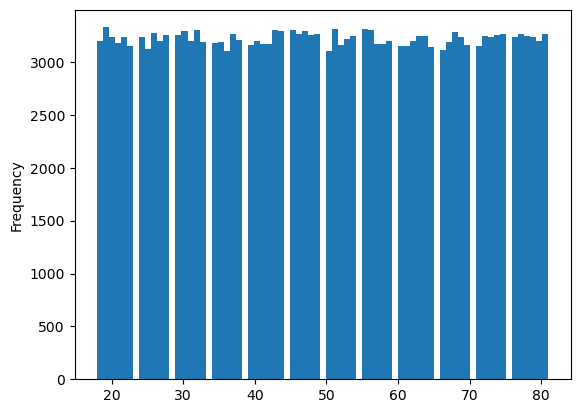

In [24]:
#check distribution
df_cust4['age'].plot.hist(bins=75)

#### -- customer ages are spread unusually evenly, similar to state 
#### -- no action needed

### date_joined	

In [25]:
#descriptive stats
df_cust4['date_joined'].describe()

C:\Users\andre\AppData\Local\Temp\ipykernel_17100\3343881943.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_cust4['date_joined'].describe()


count                  206209
unique                   1187
top       2018-09-17 00:00:00
freq                      213
first     2017-01-01 00:00:00
last      2020-04-01 00:00:00
Name: date_joined, dtype: object

In [26]:
#apply suggestion
df_cust4['date_joined'].describe(datetime_is_numeric=True)


count                           206209
mean     2018-08-17 03:06:30.029532928
min                2017-01-01 00:00:00
25%                2017-10-23 00:00:00
50%                2018-08-16 00:00:00
75%                2019-06-10 00:00:00
max                2020-04-01 00:00:00
Name: date_joined, dtype: object

In [27]:
#check frequency 
df_cust4['date_joined'].value_counts(dropna = False)

2018-09-17    213
2018-02-10    212
2019-04-01    211
2019-09-21    211
2017-12-19    210
             ... 
2018-09-01    141
2018-01-22    140
2017-11-24    139
2019-07-18    138
2018-08-06    128
Name: date_joined, Length: 1187, dtype: int64

<Axes: ylabel='Frequency'>

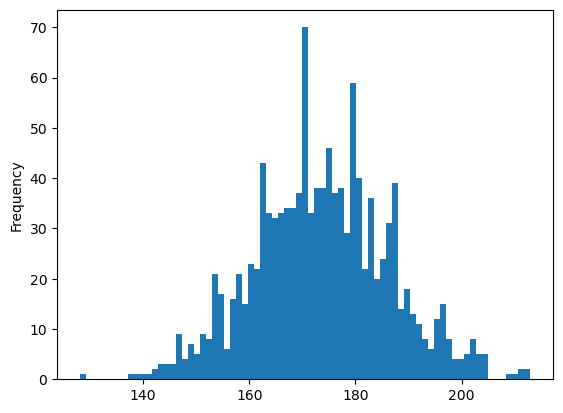

In [28]:
#check distribution
df_cust4['date_joined'].value_counts().plot.hist(bins=75)

#### -- no action needed

### n_dependants	

In [29]:
#check descriptive stats
df_cust4['n_dependants'].describe()

count    206209.000000
mean          1.499823
std           1.118433
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max           3.000000
Name: n_dependants, dtype: float64

In [30]:
#check frequency 
df_cust4['n_dependants'].value_counts(dropna = False)

0    51602
3    51594
1    51531
2    51482
Name: n_dependants, dtype: int64

#### --another variable with unusual spread across values
#### --no action needed

### fam_status	

In [31]:
#descriptive stats
df_cust4['fam_status'].describe()

count      206209
unique          4
top       married
freq       144906
Name: fam_status, dtype: object

In [32]:
#frequency
df_cust4['fam_status'].value_counts(dropna = False)

married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: fam_status, dtype: int64

#### -- no action needed

### income

In [33]:
df_cust4['income'].describe()

count    206209.000000
mean      94632.852548
std       42473.786988
min       25903.000000
25%       59874.000000
50%       93547.000000
75%      124244.000000
max      593901.000000
Name: income, dtype: float64

#### -- the range indicates outliers are present, need to investigate further. 
#### -- mean and median are close, normal distribuion is expected

<Axes: ylabel='Frequency'>

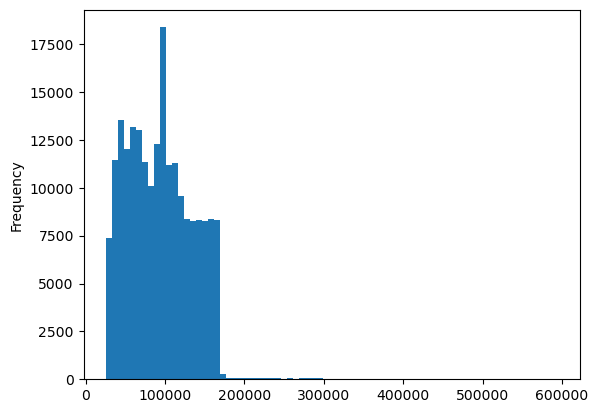

In [34]:
#check distribution
df_cust4['income'].plot.hist(bins=75)

#### -- conduct analysis on the Q4 outlier portion to establish next steps

In [35]:
#check Q4 outliers
df_cust4['income'].loc[df_cust4['income'] > 124244]

0         165665
8         162432
14        146559
21        125977
24        135302
           ...  
206196    150954
206197    140700
206199    162239
206204    148828
206205    168639
Name: income, Length: 51551, dtype: int64

In [36]:
#create outlier subset
outliers = df_cust4['income'].loc[df_cust4['income'] > 124244]

In [37]:
#descriptive stats for Q4
outliers.describe()

count     51551.000000
mean     150506.380904
std       29544.677697
min      124245.000000
25%      135918.000000
50%      147695.000000
75%      159473.500000
max      593901.000000
Name: income, dtype: float64

<Axes: ylabel='Frequency'>

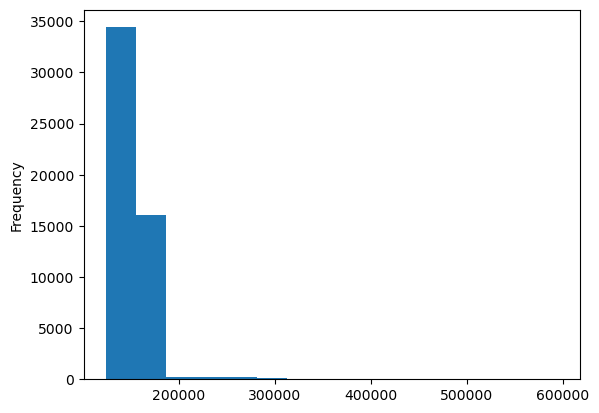

In [38]:
#view outliers distribution
outliers.plot.hist(bins=15)

#### -- the first 2 bins have a large frequency, solve for values above the second bin
#### -- (max - min)/15 = bin size, min + (2 * bin size) = cut off for outlier values
#### -- values greater than 186865.8 will be changed to null

In [39]:
#make copy
df_cust5 = df_cust4.copy()

In [40]:
#set null values 

df_cust5.loc[df_cust5['income'] > 186865.8, 'income'] = np.nan 

In [41]:
df_cust5.isnull().sum()

user_id            0
gender             0
state              0
age                0
date_joined        0
n_dependants       0
fam_status         0
income          1110
dtype: int64

In [42]:
#check 
df_cust5['income'].describe()

count    205099.000000
mean      93518.215189
std       39136.339807
min       25903.000000
25%       59721.000000
50%       93327.000000
75%      123504.500000
max      186593.000000
Name: income, dtype: float64

## 6. Combine data

In [43]:
#check merge dataset
df_merged

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_dspo,frequency_flag
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Mid-range,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Mid-range,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Mid-range,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Mid-range,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Mid-range,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,1320836,202557,prior,17,2,15,1.0,43553,2,1,...,Low-range,Regularly busy,Regularly busy,Most orders,31,Regular customer,6.905655,Low spender,8.0,Frequent customer
32404855,31526,202557,prior,18,5,11,3.0,43553,2,1,...,Low-range,Regularly busy,Regularly busy,Average orders,31,Regular customer,6.905655,Low spender,8.0,Frequent customer
32404856,758936,203436,prior,1,2,7,NaN,42338,4,0,...,Mid-range,Regularly busy,Regularly busy,Average orders,3,New customer,7.631579,Low spender,15.0,Regular customer
32404857,2745165,203436,prior,2,3,5,15.0,42338,16,1,...,Mid-range,Regularly busy,Least busy days,Fewest orders,3,New customer,7.631579,Low spender,15.0,Regular customer


In [52]:
df_cust_merged = df_merged.merge(df_cust5, on = ['user_id'], indicator = True)

In [53]:
#check
df_cust_merged

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,median_dspo,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,both
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,both
2,473747,1,prior,3,3,12,21.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,both
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,both
4,431534,1,prior,5,4,15,28.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,prior,26,4,23,5.0,19675,1,1,...,7.0,Frequent customer,Male,Hawaii,25,2017-05-26,0,single,53755.0,both
32404855,484769,66343,prior,1,6,11,NaN,47210,1,0,...,30.0,Non-frequent customer,Female,Tennessee,22,2017-09-12,3,married,46151.0,both
32404856,1561557,66343,prior,2,1,11,30.0,47210,1,1,...,30.0,Non-frequent customer,Female,Tennessee,22,2017-09-12,3,married,46151.0,both
32404857,276317,66343,prior,3,6,15,19.0,47210,1,1,...,30.0,Non-frequent customer,Female,Tennessee,22,2017-09-12,3,married,46151.0,both


In [ ]:
#check merged column
df_cust_merged['_merge'].value_counts()

In [9]:
#drop merge column
df_cust_merged = df_cust_merged.drop(columns = ['_merge'])

## 6 creating second copy of df without changing customers.income
## exporting copy for 4.10 as 4.9_part1B

In [13]:
df_cust_merged2 = df_merged.merge(df_cust4, on = ['user_id'], indicator = True)

In [14]:
#check
df_cust_merged2

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,median_dspo,frequency_flag,gender,state,age,date_joined,n_dependants,fam_status,income,_merge
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
2,473747,1,prior,3,3,12,21.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
4,431534,1,prior,5,4,15,28.0,196,1,1,...,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,156685,106143,prior,26,4,23,5.0,19675,1,1,...,7.0,Frequent customer,Male,Hawaii,25,2017-05-26,0,single,53755,both
32404855,484769,66343,prior,1,6,11,NaN,47210,1,0,...,30.0,Non-frequent customer,Female,Tennessee,22,2017-09-12,3,married,46151,both
32404856,1561557,66343,prior,2,1,11,30.0,47210,1,1,...,30.0,Non-frequent customer,Female,Tennessee,22,2017-09-12,3,married,46151,both
32404857,276317,66343,prior,3,6,15,19.0,47210,1,1,...,30.0,Non-frequent customer,Female,Tennessee,22,2017-09-12,3,married,46151,both


In [15]:
#check merged column
df_cust_merged2['_merge'].value_counts()

both          32404859
left_only            0
right_only           0
Name: _merge, dtype: int64

In [16]:
#drop merge column
df_cust_merged2 = df_cust_merged2.drop(columns = ['_merge'])

In [17]:
df_cust_merged2.to_pickle(r'C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 4\Instacart Basket Analysis\02 Data\Prepared Data\4.9_part1B.pkl')

## 7. Export dataframe as '4.9_part1.pkl'

In [11]:
df_cust_merged.to_pickle(r'C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 4\Instacart Basket Analysis\02 Data\Prepared Data\4.9_part1.pkl')